In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp

from src.model.maleckar import init_states_constants, compute_rates, legend
from src.helpers import get_value_by_key, update_array_from_kwargs
from matplotlib import pyplot as plt

In [6]:
def run_model(S, C, R, A, config, legend, only_last_beat=True):

    stim_period = get_value_by_key(C, legend['constants'], 'stim_period')
    t_sampling = config['t_sampling']
    n_beats = config['n_beats']

    t_space = np.linspace(0, stim_period * n_beats, int(stim_period / t_sampling) * n_beats + 1, endpoint=True)
    t_tail = np.linspace(stim_period * (n_beats - 1), stim_period * n_beats, int(stim_period / t_sampling) + 1, endpoint=True)
    t_span = 0, t_space[-1]
    
    if only_last_beat:
        t_eval = t_tail
    else:
        t_eval = t_space

    sol = solve_ivp(compute_rates, y0=S,
                    t_span=t_span, t_eval=t_eval,
                    args=(C, R, A),
                    method='LSODA', rtol=1e-9,
                    max_step=1. * t_sampling)
    return sol

In [24]:
S, C = init_states_constants()
R = np.zeros_like(S)
A = np.zeros(len(legend['algebraic']))

n_beats = 100
CL = 1000
stim_period = CL/1000.
t_sampling = 1e-3

C = update_array_from_kwargs(C, legend['constants'], stim_period=stim_period)

config = dict(t_sampling=t_sampling,
              n_beats=n_beats)

In [25]:
#np.savetxt("../../SVALKA/ctypes/S.txt", S)
#np.savetxt("../../SVALKA/ctypes/C.txt", C)

In [26]:
%timeit sol = run_model(S, C, R, A, config, legend, only_last_beat=False)

11.7 s ± 76.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
res = sol.y

df = pd.DataFrame(res.T, columns=legend['states']['name'])

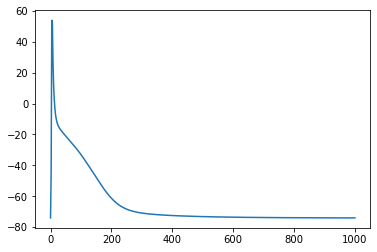

In [10]:
plt.plot(sol.y[0])